# UNSUPERVISED LEARNING FOR IRIS DATASET

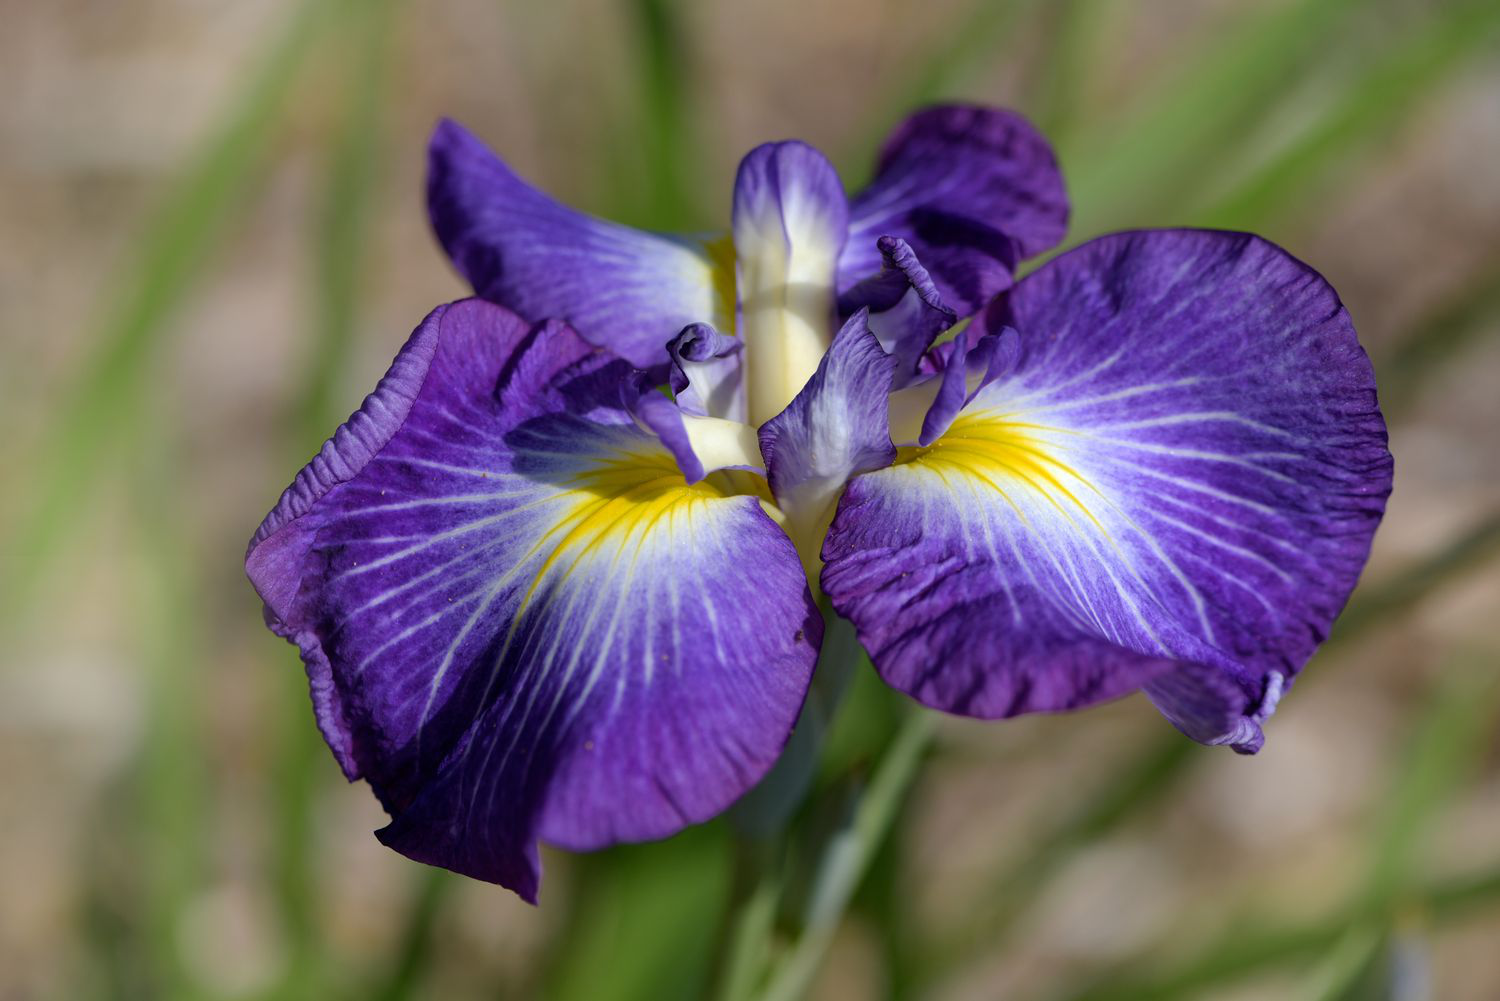

In [1]:
from PIL import Image 
from IPython.display import display
img = Image.open(r"C:\Users\DELL\Pictures\how-to-grow-and-care-for-japanese-iris-5077439-hero-bbbd19a517fa4c01a6ec5d7b70e67969.jpg")
display(img)

Unsupervised learning involves finding patterns or structures in data without explicit labels or categories. In the case of the Iris dataset, you can apply clustering methods to group the samples based on their features.The Iris dataset provides an excellent introduction to unsupervised learning techniques, allowing practitioners to explore the underlying structure of the data. By applying clustering methods and visualization techniques, one can gain insights into the similarities and differences among the species of iris flowers, even in the absence of labeled data.

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import andrews_curves
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [43]:
# Load the iris dataset
data=pd.read_csv('iris.csv')

data.head() # See the first 5 rows


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [44]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [46]:
data.shape

(150, 6)

In [47]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [48]:
data.drop(['Id'],axis=1, inplace=True)

Exploratory Data Analysis

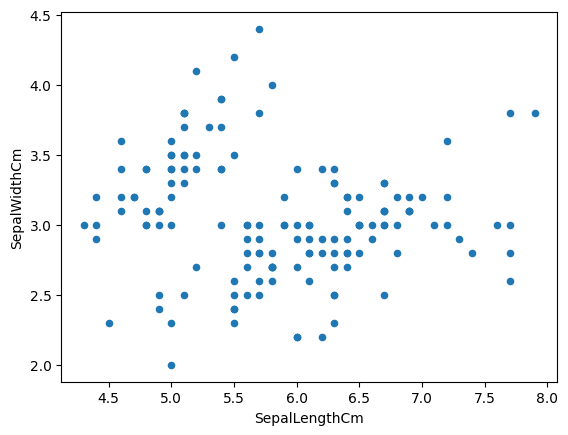

In [56]:

data.plot(kind="scatter", x="SepalLengthCm",   y="SepalWidthCm")
plt.show()

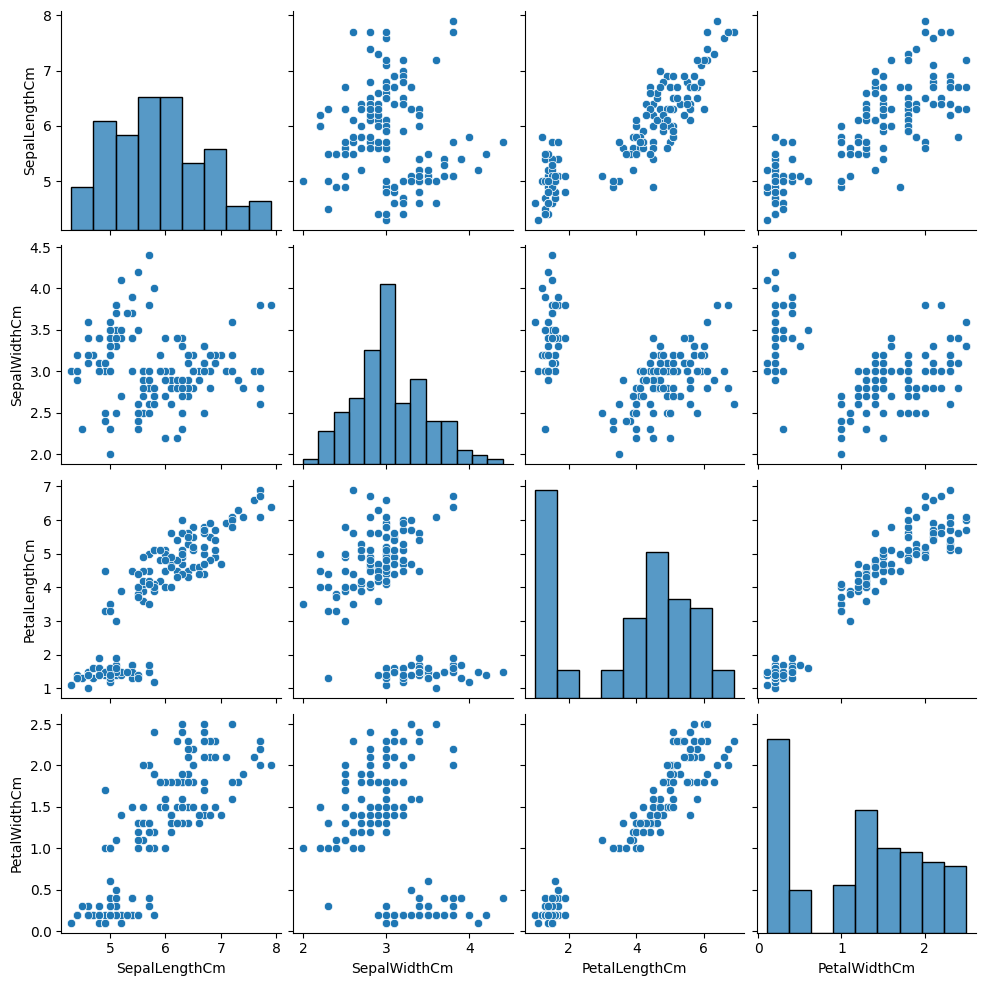

In [49]:
sns.pairplot(data)
plt.show()

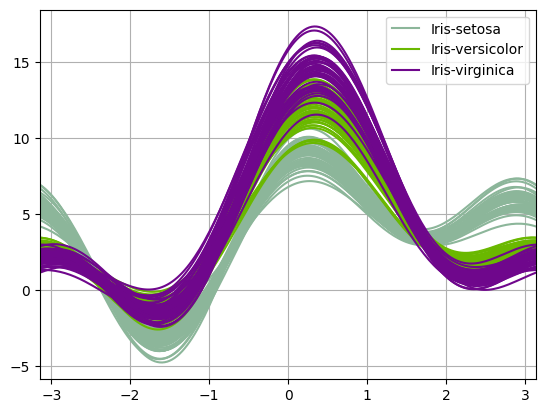

In [58]:
andrews_curves(data, "Species")
plt.show()

As highlighted, each curve corresponds to an individual data point from the original dataset. Observing one of the three clusters of curves, it is evident that the setosa group is noticeably separate from the others; however, there is significant overlap between the curves for versicolor and virginica. This observation aligns with various other analyses of the iris data and indicates that achieving a clear three-cluster separation based solely on the four columns of data is unlikely.

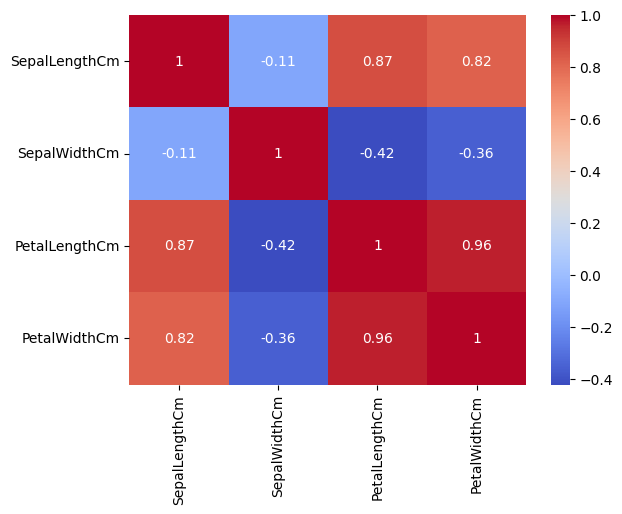

In [50]:
feature=data[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
correlation_matrix = feature.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.show()


sepal width is negatively correlated with sepal length, petal length, petal width &
petal length is positively correlated with sepal length and petal width


In [51]:
# Extract features
X = data.iloc[:, :-1]  # Drop the Species column

In [59]:
# Determine optimal number of clusters using Elbow Method
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

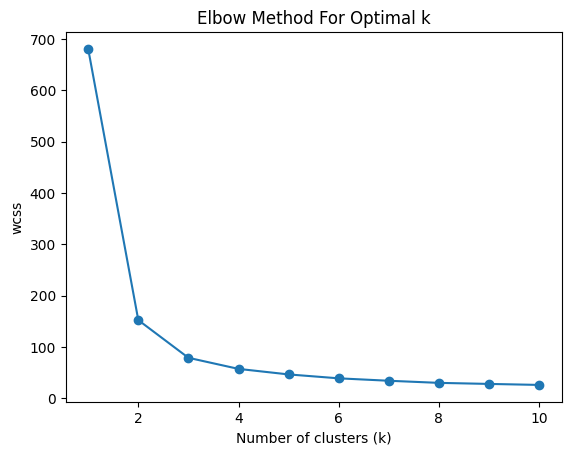

In [60]:
# Plot the Elbow Graph
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('wcss') 
plt.show()

optimal number of clusters are 3, so lets use this in model 

In [67]:
# Fit KMeans with the optimal number of clusters ( k=3 from the elbow graph)
kmeans = KMeans(n_clusters =3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y = kmeans.fit_predict(X)

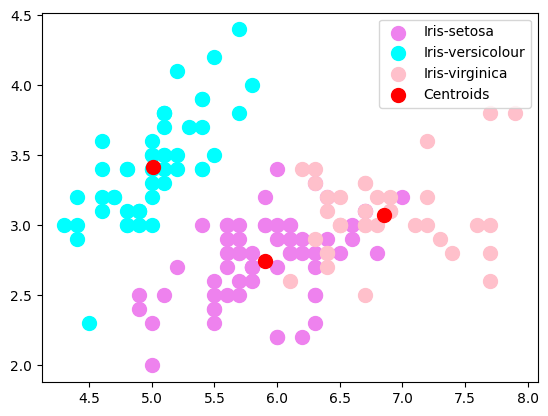

In [71]:
#Visualising the clusters
plt.scatter(X.loc[y == 0, X.columns[0]], X.loc[y == 0, X.columns[1]], s=100, c='violet', label='Iris-setosa')
plt.scatter(X.loc[y == 1, X.columns[0]], X.loc[y == 1, X.columns[1]], s=100, c='cyan', label='Iris-versicolour')
plt.scatter(X.loc[y == 2, X.columns[0]], X.loc[y == 2, X.columns[1]], s=100, c='pink', label='Iris-virginica')
#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

plt.legend()
plt.show()

Iris-versicolour cluster is not distinctly separated from the others, indicating that this species has different characteristics compared to iris-virginica and iris-sentosa. Overlapping of iris-virginica and iris-sentosa clusters suggest that they share some similarities in their features compared to iris-versicolor. The features used (e.g., sepal length, sepal width, petal length, petal width) have distinct characteristics that allow for effective separation of Iris versicolor from the other two classes (Iris setosa and Iris virginica). This means that the features of Iris versicolor are more different from the features of Iris setosa and Iris virginica.